# Lesson 1: Orbit Shape
In this notebook we'll work with the equations and parameters that describe the shape of an orbit in its plane. All code for the lesson is included in the file `utilities_l1.py`, with options in the notebook cells to write your own versions of the key functions.

Reminder: double click into a cell to edit, and make sure you run each cell (Ctrl + Enter) as you move down the notebook so that the functions and variables are in memory. 

## 1.1 Preliminaries
The first line imports code written in `utilities_l1.py` so that it can used in this notebook. To access the functions in that file use `utils.name_of_function`

The second line imports Python's built-in math module, which contains functions like `math.cos()` and `math.sqrt()`.

The third line imports a part of the matplotlib library used for plotting data.

The final four lines define useful constants (also defined in `utilities_l1.py`)

Note: unless otherwise stated, base units are meters, seconds, kilogram, radians

In [2]:
import utilities_l1 as utils
import math
import matplotlib.pyplot as plt

RADIUS_EARTH = 6371008.0
MU_EARTH = 398600441500000.0
RADIAN_TO_DEGREE = 57.2957795131
DEGREE_TO_RADIAN = 0.01745329251

## 1.2 Polar Orbit Equation
This equation describes the distance between the center of the Earth and the satellite (`r`) (note: not altitude!) as function of the angle that the satellite has progressed around its orbit (`theta`). The `theta = 0` occurs at the minimum value of `r` (perigee).

If `theta` (radians) is the input to the equation, and `r` (meters) is the output, then there are two other constants in the equation that describe the orbit:
- `a`: semi-major axis (meters), describes how big/small the orbit is
- `e`: eccentricity (unitless), describes the shape of the orbit (note: for closed orbits discussed here `0 <= e < 1`)

Here's the Polar Orbit Equation:

$$
r = \frac{a(1-e^2)}{1 + e\cos{\theta}}
$$

The function `compute_orbit_radius` below returns the value of `r` for a given trio of `a`, `e`, and `theta`. Can you replace the `r = utils...` line with your own implementation of the polar orbit equation?

In [3]:
def compute_orbit_radius(a, e, theta):
    # replace the line below with your own implementation (if you want) (can be multiple lines)
    r = utils.compute_orbit_radius(a, e, theta)
    
    return r

Play around with a few values of `a, e, theta` (meters and radians!) to see what happens to `r` (make sure you run the cell above!)

In [6]:
r = compute_orbit_radius(10000000, 0.3, 0)
print(r)

7000000.0


## 1.3 Plot Polar Orbit Equation
A single number isn't very interesting. More interesting: what does the relationship between `r` and `theta` look like across multiple values (for constant `a, e`)?

We can use the function we defined above, `compute_orbit_radius` to compute many values of `r` from many different `theta`, and then store the results in a list for use below.

In [10]:
# variables you can change
a = 10000000
e = 0.2

# these are empty lists that we will append data to in the loop below
theta_list = []
r_list = []

# the for loop steps through each value of i from 0 to 99
for i in range(100):
    theta = i * 0.0629 # value selected to go through two-pi in 100 steps
    r = compute_orbit_radius(a, e, theta)
    
    theta_list.append(theta)
    r_list.append(r)

Now plot the values `r` vs `theta` using matplotlib. Don't worry too much about this code until you want to learn more about customizing visualizations.

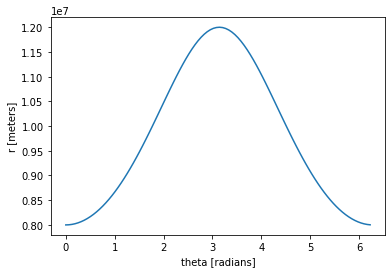

In [12]:
fig, ax = plt.subplots()
ax.plot(theta_list, r_list)
ax.set_xlabel("theta [radians]")
ax.set_ylabel("r [meters]")
plt.show()

## 1.4 Convert to Polar to Cartesian
That's also not very informative. What we really want is to visualize the orbit as a trajectory in space, and to that we need to convert from polar coordinate (`r`, `theta`) to cartesian coordinates (`x`, `y`).

This is not a bad conversion, all we need is some simple trig:

![title](images/coordinates-triangle.gif)

The function `convert_polar_to_cartesian` below converts a single `r, theta` pair in polar coordinates to the `x, y` cartesian equivalent. Can you replace the `x, y = utils...` line with your own implementation of the conversion ? (definitely use multiples lines)

In [13]:
def convert_polar_to_cartesian(r, theta):
    # replace the line below with your own implementation (if you want) (can be multiple lines)
    x, y = utils.convert_polar_to_cartesian(r, theta)
    
    return x, y

Play around with a few values of `r, theta` to make sure the output makes sense

In [15]:
x, y = convert_polar_to_cartesian(1, math.pi/2)
print(x, y)

6.123233995736766e-17 1.0


## 1.5 Visualize an Orbit

In [2]:
x, y = utils.compute_complete_orbit(30000000, 0.75, 100)

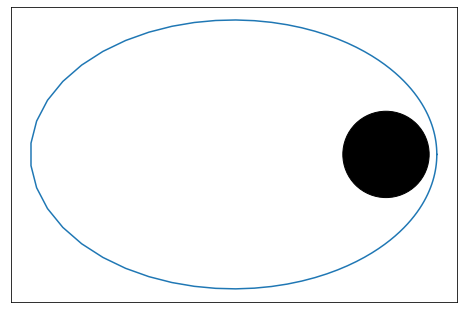

In [3]:
ax = utils.add_trajectory(x, y)

## 1.6 Ground Track 1.0